<a href="https://colab.research.google.com/github/gsgh3016/Pytorch-study/blob/main/Gamchan/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀(Logistic Regression)
---
* 이진 분류(binary classification): 둘 중 하나를 결정하는 문제
* 로지스틱 회귀: 이진 분류를 풀기 위한 대표적인 알고리즘

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

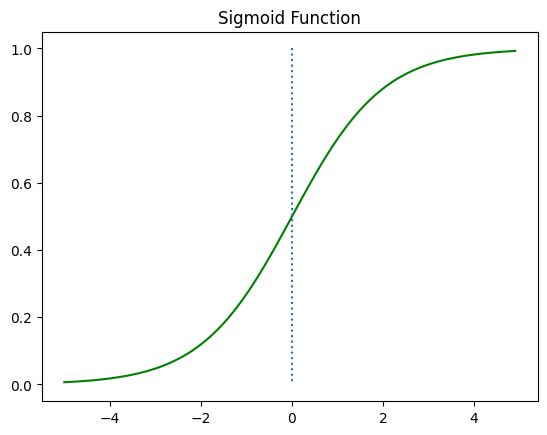

In [ ]:
x = np.arange(-5., 5., .1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1., 0.], ':')
plt.title('Sigmoid Function')
plt.show()

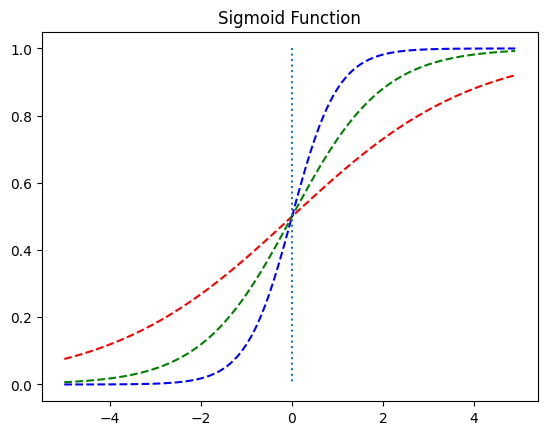

In [ ]:
y1 = sigmoid(.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g', linestyle='--')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

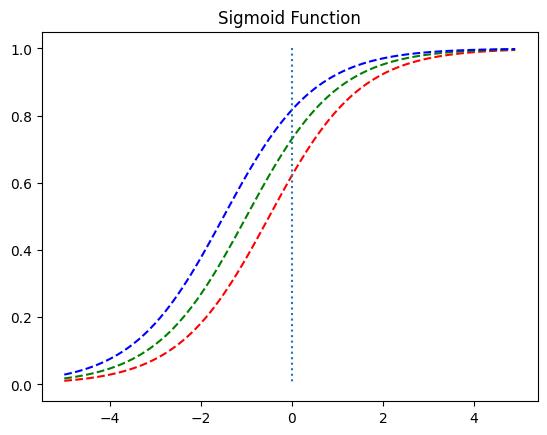

In [ ]:
y1 = sigmoid(x + .5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g', linestyle='--')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

# 시그모이드 함수 & 로지스틱 회귀의 비용 함수
---
* 로지스틱 가설: 시그모이드 함수
  * 출력 값이 0.5 이상 &rarr; `True`
  * 0.5 이하 &rarr; `False`
  
  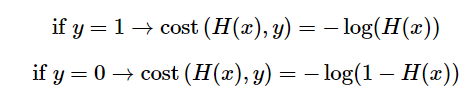
  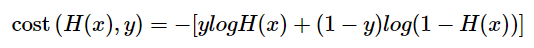

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

epochs = 100000
for epoch in range(epochs + 1):
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)
  cost = -(y_train * torch.log(hypothesis + 1e-20) + (1-y_train) * torch.log(1 - hypothesis + 1e-20)).mean()
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 1000 == 0:
    print(f"Epoch {epoch:6d}/{epochs} Cost: {cost.item():.8f}")

Epoch      0/100000 Cost: 0.69314718
Epoch   1000/100000 Cost: 0.01985216
Epoch   2000/100000 Cost: 0.01030515
Epoch   3000/100000 Cost: 0.00696457
Epoch   4000/100000 Cost: 0.00526049
Epoch   5000/100000 Cost: 0.00422659
Epoch   6000/100000 Cost: 0.00353241
Epoch   7000/100000 Cost: 0.00303411
Epoch   8000/100000 Cost: 0.00265901
Epoch   9000/100000 Cost: 0.00236646
Epoch  10000/100000 Cost: 0.00213191
Epoch  11000/100000 Cost: 0.00193966
Epoch  12000/100000 Cost: 0.00177920
Epoch  13000/100000 Cost: 0.00164327
Epoch  14000/100000 Cost: 0.00152663
Epoch  15000/100000 Cost: 0.00142544
Epoch  16000/100000 Cost: 0.00133685
Epoch  17000/100000 Cost: 0.00125862
Epoch  18000/100000 Cost: 0.00118904
Epoch  19000/100000 Cost: 0.00112676
Epoch  20000/100000 Cost: 0.00107065
Epoch  21000/100000 Cost: 0.00101991
Epoch  22000/100000 Cost: 0.00097376
Epoch  23000/100000 Cost: 0.00093154
Epoch  24000/100000 Cost: 0.00089288
Epoch  25000/100000 Cost: 0.00085731
Epoch  26000/100000 Cost: 0.00082443
E

In [ ]:
print(hypothesis)

tensor([[3.4520e-09],
        [3.5998e-04],
        [4.1997e-04],
        [9.9949e-01],
        [1.0000e+00],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W, b, sep='\n')

tensor([[7.7549],
        [3.8003]], requires_grad=True)
tensor([-34.8399], requires_grad=True)


The code you provided is implementing logistic regression using PyTorch. The issue you're facing, where the cost function returns a `nan` value after a certain number of epochs, is a common problem in training neural networks and can be attributed to several reasons:

1. **Vanishing and Exploding Gradients**: When training deep neural networks, the gradients can become either too small (vanish) or too large (explode). In the context of logistic regression, exploding gradients can be more relevant. When gradients explode, the weights and biases of the model can be updated with very large values, leading to numerical instability. This can cause the model's output (hypothesis) to be extremely close to 0 or 1, and when you take the logarithm in the cost function, it results in `nan`.

2. **Learning Rate**: A high learning rate can cause the model to converge too quickly to a suboptimal solution or even diverge. In your code, the learning rate is set to `1`, which is relatively high. This can cause the weights and biases to update too aggressively, leading to the aforementioned exploding gradients.

3. **Logarithm of Zero**: In the cost function, you're taking the logarithm of the hypothesis and `1 - hypothesis`. If the hypothesis becomes exactly `0` or `1`, then the logarithm is undefined, resulting in `nan`.

To address these issues, you can:

1. **Adjust the Learning Rate**: Try reducing the learning rate. Common values to try are `0.1`, `0.01`, or even smaller.

   ```python
   optimizer = optim.SGD([W, b], lr=0.1)
   ```

2. **Clipping Gradients**: This is a technique to prevent gradients from becoming too large. You can set a threshold value, and if the gradient exceeds this value, it's clipped to prevent it from exploding.

   ```python
   torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
   ```

3. **Regularization**: Adding regularization can help in preventing weights from becoming too large, which can be a source of numerical instability.

4. **Check for Log(0)**: Before computing the cost, you can add a small value (like `1e-7`) to the logarithm computation to prevent taking the log of zero.

   ```python
   cost = -(y_train * torch.log(hypothesis + 1e-7) + (1-y_train) * torch.log(1 - hypothesis + 1e-7)).mean()
   ```

5. **Monitor Weights and Gradients**: It's helpful to print or plot the values of weights, biases, and gradients during training to see if they're increasing to extremely large values.

By implementing these suggestions, you should be able to prevent the cost function from returning `nan` values during training.

# `nn.Module`로 구현하는 로지스틱 회귀
---


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

In [ ]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 1000
for epoch in range(epochs + 1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print(f'Epoch {epoch:4d}/{epochs} cost:{cost.item()} accuracy:{accuracy:2.2f}')

Epoch    0/1000 cost:0.5397130846977234 accuracy:0.83
Epoch   10/1000 cost:0.6148526072502136 accuracy:0.67
Epoch   20/1000 cost:0.4418751895427704 accuracy:0.67
Epoch   30/1000 cost:0.37314531207084656 accuracy:0.83
Epoch   40/1000 cost:0.31635817885398865 accuracy:0.83
Epoch   50/1000 cost:0.26609399914741516 accuracy:0.83
Epoch   60/1000 cost:0.22049756348133087 accuracy:1.00
Epoch   70/1000 cost:0.18209488689899445 accuracy:1.00
Epoch   80/1000 cost:0.15729930996894836 accuracy:1.00
Epoch   90/1000 cost:0.1440911740064621 accuracy:1.00
Epoch  100/1000 cost:0.1342717856168747 accuracy:1.00
Epoch  110/1000 cost:0.1257687360048294 accuracy:1.00
Epoch  120/1000 cost:0.11829733103513718 accuracy:1.00
Epoch  130/1000 cost:0.11168012768030167 accuracy:1.00
Epoch  140/1000 cost:0.10577862709760666 accuracy:1.00
Epoch  150/1000 cost:0.10048282146453857 accuracy:1.00
Epoch  160/1000 cost:0.09570375084877014 accuracy:1.00
Epoch  170/1000 cost:0.0913691520690918 accuracy:1.00
Epoch  180/1000 c

In [ ]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


시그모이드 함수: 인공 신경망의 은닉층에서 거의 사용 X

# 클래스로 파이토치 모델 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [ ]:
model = BinaryClassifier()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 1000
for epoch in range(epochs + 1):
  hypothesis = model(x_train)

  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print(f"Epoch: {epoch:4d}/{epochs} cost:{cost.item():.6f} accuracy:{accuracy * 100:2.2f}%")

Epoch:    0/1000 cost:0.539713 accuracy:83.33%
Epoch:   10/1000 cost:0.614853 accuracy:66.67%
Epoch:   20/1000 cost:0.441875 accuracy:66.67%
Epoch:   30/1000 cost:0.373145 accuracy:83.33%
Epoch:   40/1000 cost:0.316358 accuracy:83.33%
Epoch:   50/1000 cost:0.266094 accuracy:83.33%
Epoch:   60/1000 cost:0.220498 accuracy:100.00%
Epoch:   70/1000 cost:0.182095 accuracy:100.00%
Epoch:   80/1000 cost:0.157299 accuracy:100.00%
Epoch:   90/1000 cost:0.144091 accuracy:100.00%
Epoch:  100/1000 cost:0.134272 accuracy:100.00%
Epoch:  110/1000 cost:0.125769 accuracy:100.00%
Epoch:  120/1000 cost:0.118297 accuracy:100.00%
Epoch:  130/1000 cost:0.111680 accuracy:100.00%
Epoch:  140/1000 cost:0.105779 accuracy:100.00%
Epoch:  150/1000 cost:0.100483 accuracy:100.00%
Epoch:  160/1000 cost:0.095704 accuracy:100.00%
Epoch:  170/1000 cost:0.091369 accuracy:100.00%
Epoch:  180/1000 cost:0.087420 accuracy:100.00%
Epoch:  190/1000 cost:0.083806 accuracy:100.00%
Epoch:  200/1000 cost:0.080486 accuracy:100.00